# Five Different Models Based on Amount of Transaction

Divided the df dataset by transaction amount, $1, $10, $25, 50, $75. Then did the same random forest on each to see if the model performed better with transactions that were more similar in size. 

In [37]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# DO NOT REMOVE This
%reload_ext autoreload

In [39]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

In [40]:
fis.test_base()

Base Module Imported

Testing local imports
In clean_data
In Model
In Visualize
In custom module


# Import Libraries

In [41]:
# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Profiling
import pandas_profiling

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Normalize
from sklearn.preprocessing import normalize
    # Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    # GridSearch
from sklearn.model_selection import GridSearchCV
    # PCA
from sklearn.decomposition import PCA
    
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial import distance

# Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  #Bagging & Random Forest
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
    # Visuals for Random Forest
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Logistic Regression
    # SK-learn
from sklearn.linear_model import LogisticRegression
    # Statsmodel
import statsmodels.api as sm
from patsy import dmatrices



# Data Importing

In [42]:
pwd

'/Users/flatironschool/BootCamp/Mod_5_credit_card_fraud_project/notebooks'

In [43]:
csv_name = 'creditcard.csv'

df = pd.read_csv('/Users/flatironschool/BootCamp/Mod_5_credit_card_fraud_project/notebooks/data/raw/creditcard.csv')

In [44]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Cleaning

In [45]:
# Adam's Code

# overall look
df.head()
df.shape
df.columns

# values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Make Time Variables

There is a pattern in the Time variable, which is in seconds since the start of the file. There is clearly a drop-off of credit card transactions in what we assumed was the middle of the night. We divided the time period which covers two and a quarter days, into four periods, which start at 1 pm. 

In [46]:
#creating the four time periods
secs_per_day = 86400
secs_per_hour = 3600
start = 3600 #1am
period1 = start + 3600*6 #1-7am
period2 = period1 + 3600*6 #7am-1pm
period3 = period2 + 3600*6 #1pm-7pm
period4 = period3 + 3600*5 #7am-12am


In [47]:
#adding a new column to the data frame for the time periods
df['time_of_day']=df['Time'].apply(lambda x: x - secs_per_day if x >= secs_per_day else x)

In [48]:
#adding the time periods as a number
df['time_of_day'][(df['time_of_day']<start)] = 3
df['time_of_day'][(df['time_of_day']>=start) & (df['time_of_day']<period1)] = 0
df['time_of_day'][(df['time_of_day']>=period1) & (df['time_of_day']<period2)] = 1
df['time_of_day'][(df['time_of_day']>=period2) & (df['time_of_day']<period3)] = 2
df['time_of_day'][(df['time_of_day']>=period3)] = 3

## Drop Duplicates

In [49]:
df.drop_duplicates(inplace = True)

In [51]:
df.info()
#1081 duplicated rows dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 32 columns):
Time           283726 non-null float64
V1             283726 non-null float64
V2             283726 non-null float64
V3             283726 non-null float64
V4             283726 non-null float64
V5             283726 non-null float64
V6             283726 non-null float64
V7             283726 non-null float64
V8             283726 non-null float64
V9             283726 non-null float64
V10            283726 non-null float64
V11            283726 non-null float64
V12            283726 non-null float64
V13            283726 non-null float64
V14            283726 non-null float64
V15            283726 non-null float64
V16            283726 non-null float64
V17            283726 non-null float64
V18            283726 non-null float64
V19            283726 non-null float64
V20            283726 non-null float64
V21            283726 non-null float64
V22            283726 non-null 

## Another experiment. Build a model using only values above a certain amount.

The theory is that it costs a certain amount to call a customer and ask if the transaction was valid. Amounts below that cutoff could be flagged using a different algorithm. Amounts above the cutoff should be tuned differently as the risk is greater than the cost of investigating.

In [52]:
df_amount_75 = df[df['Amount'] > 75]
df_amount_50 = df[df['Amount'] > 50]
df_amount_25 = df[df['Amount'] > 25]
df_amount_10 = df[df['Amount'] > 10]
df_amount_1 = df[df['Amount'] > 1]

In [53]:
df_amount_75.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_of_day
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,3.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,3.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0,3.0
12,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0,3.0


In [54]:
df_amount_50.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_of_day
count,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,...,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000,93578.000000
mean,93095.339182,-0.208622,-0.845233,-0.103553,-0.005920,-0.428380,0.219803,0.099818,-0.024341,-0.088726,...,0.028325,-0.009325,-0.020773,0.006328,-0.010105,-0.017271,-0.000053,239.031808,0.001924,1.821326
std,47000.674779,2.282410,2.031874,1.664216,1.489112,1.661819,1.452866,1.583295,1.230387,1.144603,...,0.751830,0.902373,0.620514,0.562429,0.540093,0.446409,0.445322,394.828035,0.043816,0.868538
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-9.283925,...,-10.933144,-44.807735,-2.824849,-10.295397,-2.604551,-22.565679,-15.430084,50.010000,0.000000,0.000000
25%,51367.250000,-1.161463,-1.347231,-0.954448,-0.961343,-1.144406,-0.590800,-0.614733,-0.222802,-0.839405,...,-0.450314,-0.212807,-0.366360,-0.309409,-0.369505,-0.090743,-0.044689,78.940000,0.000000,1.000000
50%,81600.500000,0.161507,-0.638903,0.115416,-0.060742,-0.471086,-0.034586,-0.002425,0.032277,-0.124603,...,0.063300,-0.027841,0.036025,0.053671,-0.123835,-0.015070,0.017650,125.960000,0.000000,2.000000
75%,137335.000000,1.234458,0.041708,0.967180,0.841238,0.260768,0.704714,0.673724,0.331602,0.659164,...,0.551827,0.174638,0.431259,0.366695,0.309910,0.057031,0.070372,244.450000,0.000000,3.000000
max,172792.000000,2.347444,18.183626,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000,3.000000


In [55]:
df_amount_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134086 entries, 0 to 284806
Data columns (total 32 columns):
Time           134086 non-null float64
V1             134086 non-null float64
V2             134086 non-null float64
V3             134086 non-null float64
V4             134086 non-null float64
V5             134086 non-null float64
V6             134086 non-null float64
V7             134086 non-null float64
V8             134086 non-null float64
V9             134086 non-null float64
V10            134086 non-null float64
V11            134086 non-null float64
V12            134086 non-null float64
V13            134086 non-null float64
V14            134086 non-null float64
V15            134086 non-null float64
V16            134086 non-null float64
V17            134086 non-null float64
V18            134086 non-null float64
V19            134086 non-null float64
V20            134086 non-null float64
V21            134086 non-null float64
V22            134086 non-null 

In [56]:
df_amount_10['Class'].value_counts()

0    183670
1       235
Name: Class, dtype: int64

In [57]:
df_amount_1['Class'].value_counts()

0    253093
1       302
Name: Class, dtype: int64

## Class Weighting Random Forest 

In [85]:
def make_class_weight_models(weighting):
    #train test split 
    #create target and feature variables, dropped Time from variables
    y = df['Class']
    X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142, stratify = y)
    
    #build random forest model
    forest_weight = RandomForestClassifier(max_depth= 10, bootstrap = True, class_weight=weighting)
    forest_weight.fit(X_train, y_train)
    train_score = forest_weight.score(X_train, y_train) # Accuracy of training data
    test_score = forest_weight.score(X_test, y_test) # Accuracy of test data
    
    # Prediction
    forest_pred = forest_weight.predict(X_test)

    # Plot the model
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), forest_weight.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    # Print metrics
   # print(df_by_size)
    print('Train Score: ', train_score) # Accuracy of training data
    print('Test Score:', test_score)
    print('\n')
    print(confusion_matrix(y_test, forest_pred))
    print('\n')
    print(classification_report(y_test, forest_pred))
    

Train Score:  0.9997106725023146
Test Score: 0.9995407454875574


[[93465     9]
 [   34   122]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93474
           1       0.93      0.78      0.85       156

    accuracy                           1.00     93630
   macro avg       0.97      0.89      0.92     93630
weighted avg       1.00      1.00      1.00     93630



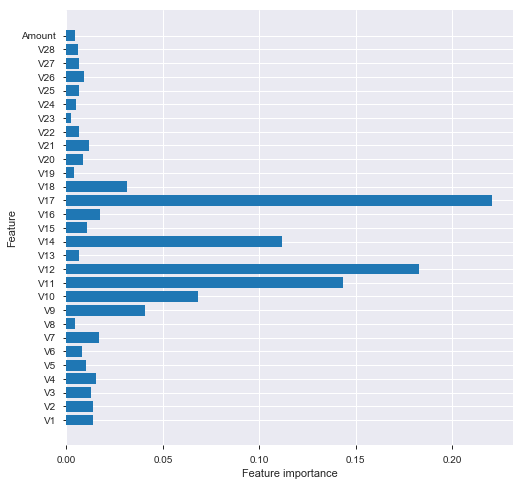

In [86]:
make_class_weight_models({0: 1, 1: 2})

Train Score:  0.9997211935022304
Test Score: 0.9995941471750507


[[93469     5]
 [   33   123]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93474
           1       0.96      0.79      0.87       156

    accuracy                           1.00     93630
   macro avg       0.98      0.89      0.93     93630
weighted avg       1.00      1.00      1.00     93630



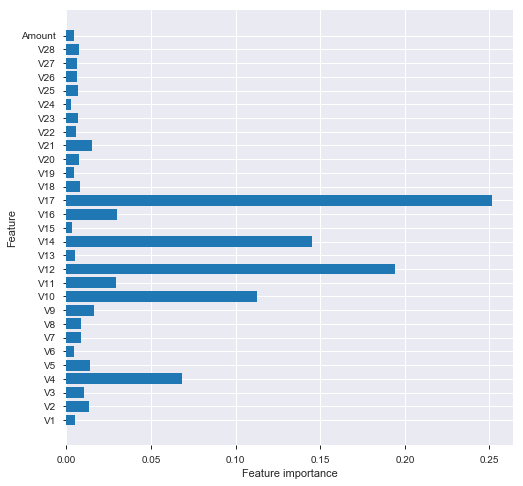

In [87]:
make_class_weight_models({0: 1, 1: 3})

Train Score:  0.9996948910024409
Test Score: 0.9995621061625547


[[93463    11]
 [   30   126]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93474
           1       0.92      0.81      0.86       156

    accuracy                           1.00     93630
   macro avg       0.96      0.90      0.93     93630
weighted avg       1.00      1.00      1.00     93630



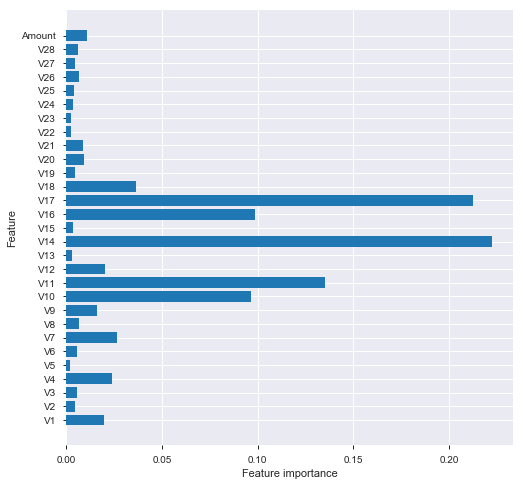

In [88]:
make_class_weight_models({0: 1, 1: 4})

Train Score:  0.9997264540021884
Test Score: 0.9995727865000534


[[93468     6]
 [   34   122]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93474
           1       0.95      0.78      0.86       156

    accuracy                           1.00     93630
   macro avg       0.98      0.89      0.93     93630
weighted avg       1.00      1.00      1.00     93630



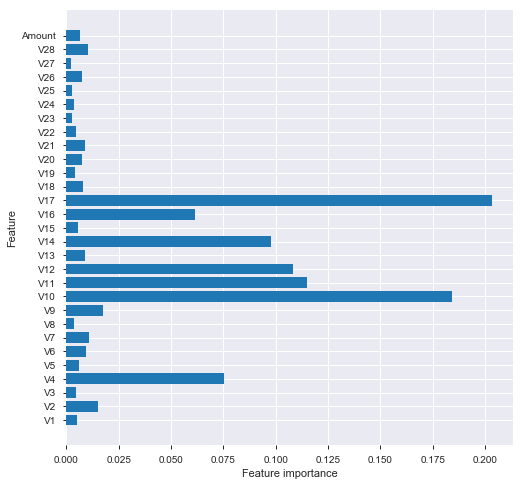

In [89]:
make_class_weight_models({0: 1, 1: 5})

Train Score:  0.9997106725023146
Test Score: 0.9995727865000534


[[93468     6]
 [   34   122]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93474
           1       0.95      0.78      0.86       156

    accuracy                           1.00     93630
   macro avg       0.98      0.89      0.93     93630
weighted avg       1.00      1.00      1.00     93630



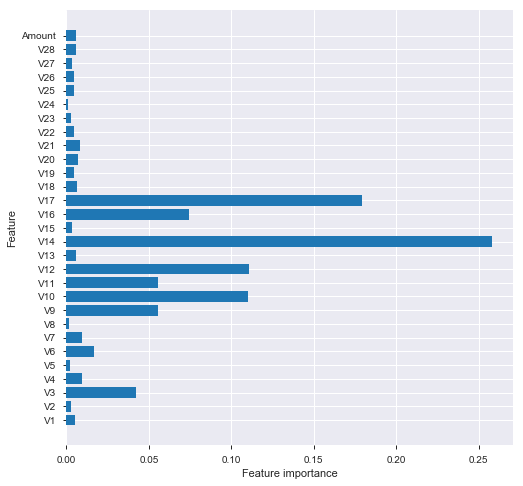

In [90]:
make_class_weight_models({0: 1, 1: 10})

## Train-Test Split - Random Forest - Metrics

In [71]:
def make_amount_models(df_by_size):
    #train test split 
    #create target and feature variables
    y = df_by_size['Class']
    X = df_by_size[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142, stratify = y)
    
    #build random forest model
    forest_amount = RandomForestClassifier(n_estimators=100, max_depth= 9)
    forest_amount.fit(X_train, y_train)
    train_score = forest_amount.score(X_train, y_train) # Accuracy of training data
    test_score = forest_amount.score(X_test, y_test) # Accuracy of test data
    
    # Prediction
    forest_pred = forest_amount.predict(X_test)

    # Plot the model
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), forest_amount.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    # Print metrics
   # print(df_by_size)
    print('Train Score: ', train_score) # Accuracy of training data
    print('Test Score:', test_score)
    print('\n')
    print(confusion_matrix(y_test, forest_pred))
    print('\n')
    print(classification_report(y_test, forest_pred))
    

Train Score:  0.9996091258820383
Test Score: 0.9993735120912166


[[23885     2]
 [   13    43]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23887
           1       0.96      0.77      0.85        56

    accuracy                           1.00     23943
   macro avg       0.98      0.88      0.93     23943
weighted avg       1.00      1.00      1.00     23943



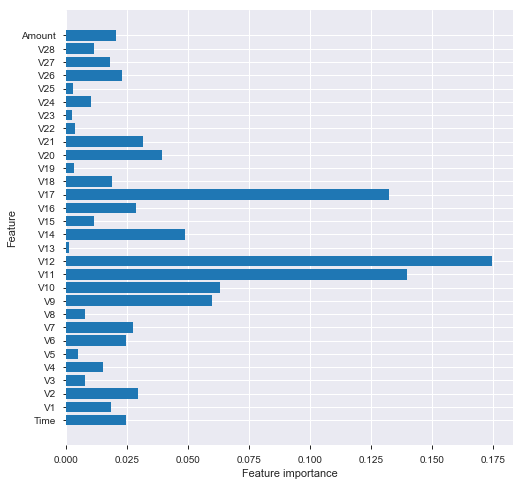

In [72]:
make_amount_models(df_amount_75)

Train Score:  0.999665055744294
Test Score: 0.9994494996923675


[[30822     0]
 [   17    42]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30822
           1       1.00      0.71      0.83        59

    accuracy                           1.00     30881
   macro avg       1.00      0.86      0.92     30881
weighted avg       1.00      1.00      1.00     30881



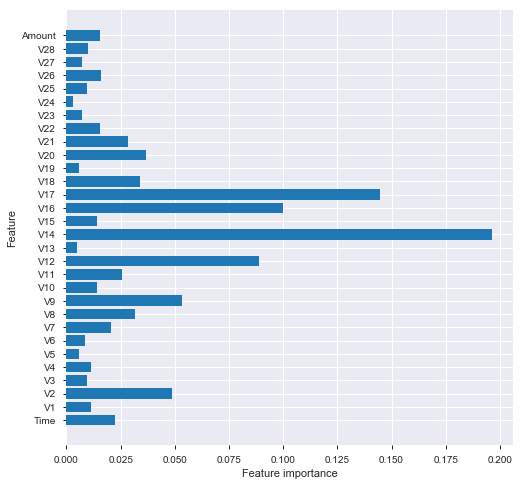

In [73]:
make_amount_models(df_amount_50)

Train Score:  0.9997328494940837
Test Score: 0.9995480123844607


[[44177     3]
 [   17    52]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44180
           1       0.95      0.75      0.84        69

    accuracy                           1.00     44249
   macro avg       0.97      0.88      0.92     44249
weighted avg       1.00      1.00      1.00     44249



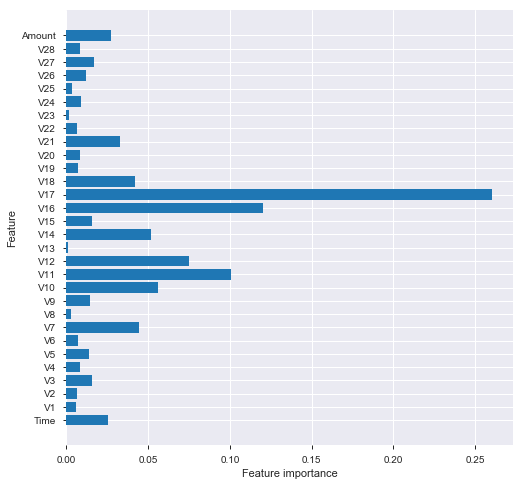

In [74]:
make_amount_models(df_amount_25)

Train Score:  0.9997808726139462
Test Score: 0.9996539735372143


[[60608     3]
 [   18    60]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60611
           1       0.95      0.77      0.85        78

    accuracy                           1.00     60689
   macro avg       0.98      0.88      0.93     60689
weighted avg       1.00      1.00      1.00     60689



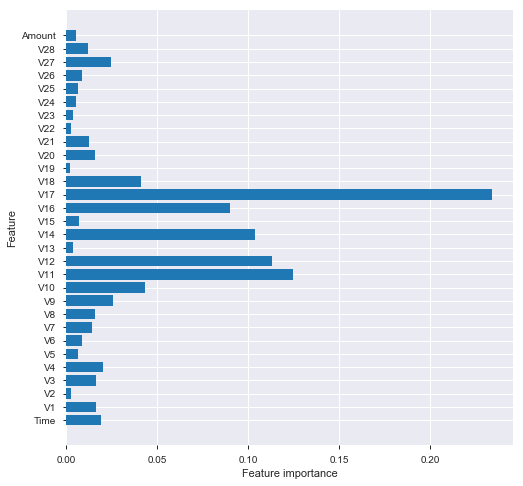

In [75]:
make_amount_models(df_amount_10)

Train Score:  0.9997231613792453
Test Score: 0.9996412384448883


[[83515     6]
 [   24    76]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83521
           1       0.93      0.76      0.84       100

    accuracy                           1.00     83621
   macro avg       0.96      0.88      0.92     83621
weighted avg       1.00      1.00      1.00     83621



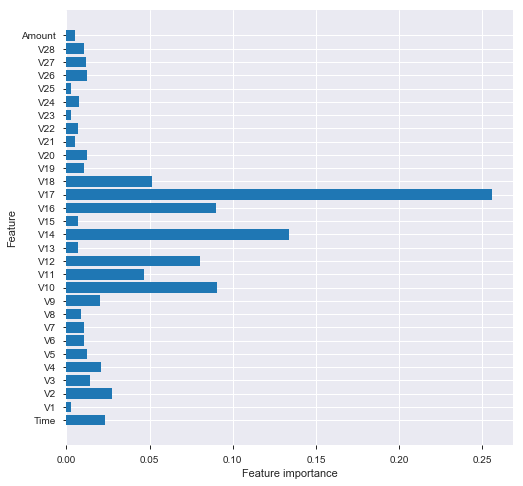

In [76]:
make_amount_models(df_amount_1)

In [26]:
def X_and_y_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=142, stratify = y)
    return X_train, X_test, y_train, y_test

# Random Forest

In [27]:
# Function to show importance of each feature
def plot_feature_importances(model):
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance", df_by_size)
    plt.ylabel("Feature")


In [31]:
# Random Forest in code, uses the best model from previous work
def random_forest_generator(X_train, X_test, y_train, y_test):
    forest_amount = RandomForestClassifier(n_estimators=100, max_depth= 9)
    forest_amount.fit(X_train, y_train)
    train_score = forest_amount.score(X_train, y_train) # Accuracy of training data
    test_score = forest_amount.score(X_test, y_test) # Accuracy of test data
    return forest_amount, train_score, test_score, forest_fit


In [33]:
def print_scores(forest_amount, train_score, test_score):
    plot_feature_importances(forest_amount) # plot using function above
    print('Train Score: ', train_score(X_train, y_train)) # Accuracy of training data
    print('Test Score:', test_score(X_test, y_test))

In [34]:
def predictions(forest_fit):
    forest_pred = forest.predict(X_test)
    return forest_pred

In [35]:
def print_metrics(forest_pred):
    print(confusion_matrix(y_test, forest_pred))
    print('/n')
    print(classification_report(y_test, forest_pred))

In [36]:
target_feat_split(df_amount_75)
target_feat_split(df_amount_50)
target_feat_split(df_amount_25)
target_feat_split(df_amount_10)
target_feat_split(df_amount_1)

(            Time         V1         V2        V3        V4        V5  \
 0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
 1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
 2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
 3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
 4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
 5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
 6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
 7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
 8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
 9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
 10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
 11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
 12          10.0   1.249999  -1.221637  0.383930 -

In [ ]:
df_random = df_cleaned.copy()

In [ ]:
# Adam's Code

classifier = DecisionTreeClassifier(random_state=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is : {}%".format(round(acc, 2)))
    # Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
classifier2.fit(X_train, y_train)
    # Make predictions for test data
y_pred = classifier2.predict(X_test)
    # Calculate Accuracy
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
    # Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


# Function for plotting feature importance
classifier2.feature_importances_ # How much does this feature reduce entropy
    # Function to show importance of each feature
def plot_feature_importances(model):
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(classifier2)
    # confusion matrix print
pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data
plot_feature_importances(forest) # plot using function above

# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)


In [39]:
target = df['Class']
feat = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [51]:
featcor = feat.corr()

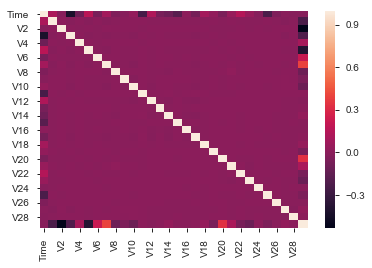

In [52]:
#Nothing is highly correlated
sns.heatmap(featcor)

In [85]:
X = feat
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify = y)

## First try at Random Forests

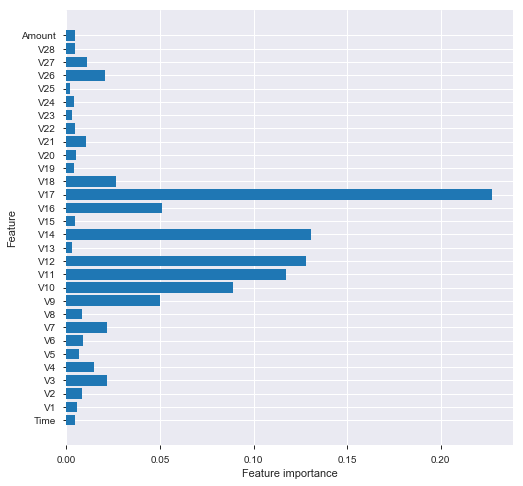

In [54]:
#First try at Random Forests
# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data

plot_feature_importances(forest) # plot using function above

In [55]:
print('Train Forest Score: ', forest.score(X_train, y_train)) # Accuracy of training data
print('Test Forest Score:', forest.score(X_test, y_test))

Train Forest Score:  0.9995686390034509
Test Forest Score: 0.9994339421125708


In [56]:
forest_pred = forest.predict(X_test)

In [57]:
print(confusion_matrix(y_test, forest_pred))
print('/n')
print(classification_report(y_test, forest_pred))

[[93477     6]
 [   47   100]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.94      0.68      0.79       147

    accuracy                           1.00     93630
   macro avg       0.97      0.84      0.90     93630
weighted avg       1.00      1.00      1.00     93630



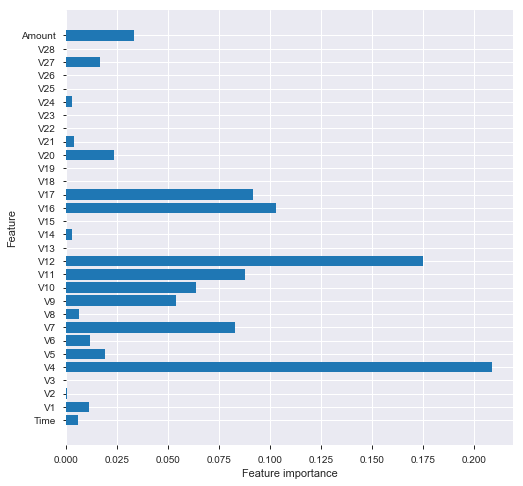

In [58]:
# Second try - Different parameters
forest_2 = RandomForestClassifier(n_estimators = 10, max_features=2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

plot_feature_importances(forest_2)

In [59]:
print('Train Forest_2 Score: ', forest_2.score(X_train, y_train)) # Accuracy of training data
print('Test Forest_2 Score:', forest_2.score(X_test, y_test))

Train Forest_2 Score:  0.998684875010521
Test Forest_2 Score: 0.9987504005126562


In [60]:
forest_2_pred = forest_2.predict(X_test)

In [61]:
print(confusion_matrix(y_test, forest_pred))
print('/n')
print(classification_report(y_test, forest_pred))

[[93477     6]
 [   47   100]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.94      0.68      0.79       147

    accuracy                           1.00     93630
   macro avg       0.97      0.84      0.90     93630
weighted avg       1.00      1.00      1.00     93630



In [76]:
pip install -U imbalanced-learn

    100% |████████████████████████████████| 174kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 10.5MB 1.8MB/s ta 0:00:01
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


In [62]:
#generated three terms that are the best, but could not get it work in models later
rtc = RandomForestClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20]
}

gs_tree = GridSearchCV(rtc, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}

In [63]:
print('Train gs_tree Score: ', gs_tree.score(X_train, y_train)) # Accuracy of training data
print('Test gs_tree Score:', gs_tree.score(X_test, y_test))

Train gs_tree Score:  0.9996580675027354
Test gs_tree Score: 0.9994873438000641


In [64]:
gs_tree_pred = gs_tree.predict(X_test)

In [65]:
print(confusion_matrix(y_test, gs_tree_pred))
print('/n')
print(classification_report(y_test, gs_tree_pred))

[[93477     6]
 [   42   105]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.95      0.71      0.81       147

    accuracy                           1.00     93630
   macro avg       0.97      0.86      0.91     93630
weighted avg       1.00      1.00      1.00     93630



In [66]:
#using values from grid search
#Continued to error out using values from grid search
rtc = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'gini'], 'max_depth': [10, 10], 'min_samples_split': [10, 10]}
gs_best = GridSearchCV(rtc, param_grid, cv=3)
gs_best.fit(X_train, y_train)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

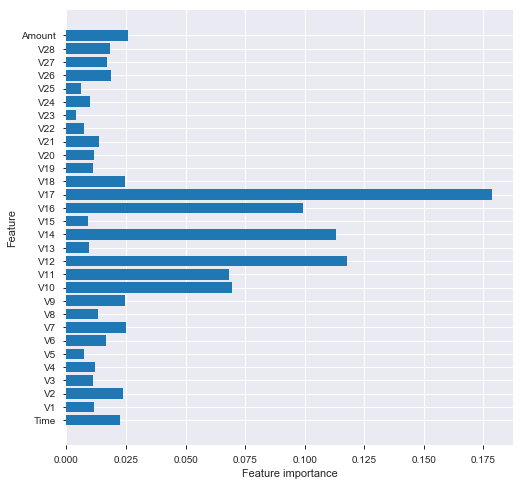

In [166]:
# Random Forest in code, uses the best model from above
forest_amount = RandomForestClassifier(n_estimators=100, max_depth= 9)
forest_amount.fit(X_train, y_train)
forest_amount.score(X_train, y_train) # Accuracy of training data
forest_amount.score(X_test, y_test) # Accuracy of test data

plot_feature_importances(forest_amount) # plot using function above

In [167]:
print('Train forest_amount Score: ', forest_amount.score(X_train, y_train)) # Accuracy of training data
print('Test forest_amount Score:', forest_amount.score(X_test, y_test))

Train forest_amount Score:  0.9995679812380424
Test forest_amount Score: 0.999331746230631


In [168]:
forest_amount_pred = forest_amount.predict(X_test)

In [169]:
print(confusion_matrix(y_test, forest_amount_pred))
print('/n')
print(classification_report(y_test, forest_amount_pred))

[[23883     4]
 [   12    44]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23887
           1       0.92      0.79      0.85        56

    accuracy                           1.00     23943
   macro avg       0.96      0.89      0.92     23943
weighted avg       1.00      1.00      1.00     23943



In [137]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification

In [138]:
X, y = make_classification(n_samples=1000, n_informative=4, random_state=101)

In [140]:
brf = BalancedRandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5)

In [141]:
brf.fit(X_train, y_train)

RecursionError: maximum recursion depth exceeded

In [115]:
brf_y_pred = brf.predict(X_test)

In [139]:


print('Balanced Random Forest Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('\n')
print('Balanced Random Forest Feature Importances: ', brf.feature_importances_)


NotFittedError: This BalancedRandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [81]:
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=4, weights=[0.2, 0.3, 0.5], random_state=42)

In [90]:
clf = BalancedRandomForestClassifier(max_depth=1, random_state=42)

In [91]:
clf.fit(X, y)  # doctest: +ELLIPSIS

RecursionError: maximum recursion depth exceeded

In [ ]:


>>> X, y = make_classification(n_samples=1000, n_classes=3,
...                            n_informative=4, weights=[0.2, 0.3, 0.5],
...                            random_state=0)
>>> clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
>>> clf.fit(X, y)  # doctest: +ELLIPSIS
BalancedRandomForestClassifier(...)
>>> print(clf.feature_importances_)  # doctest: +ELLIPSIS
[...]
>>> print(clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
...                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))
[1]


In [ ]:
#First try at Random Forests
# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data
plot_feature_importances(forest) # plot using function above

# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(estimator = rfc, param_grid, cv=5)
gs.fit(X_train, y_train)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)

## Fails - code to look at again, but first time a fail

In [104]:
#weighted random forest
w = 100 # The weight for the positive class
RF = RandomForestClassifier(class_weight={0: 1, 1: w})

In [105]:
RF.fit()

RecursionError: maximum recursion depth exceeded